In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. 读取原始数据
2. 计算每ms内平均值
3. 输出原始数据和ms平均值曲线、每毫秒平均值

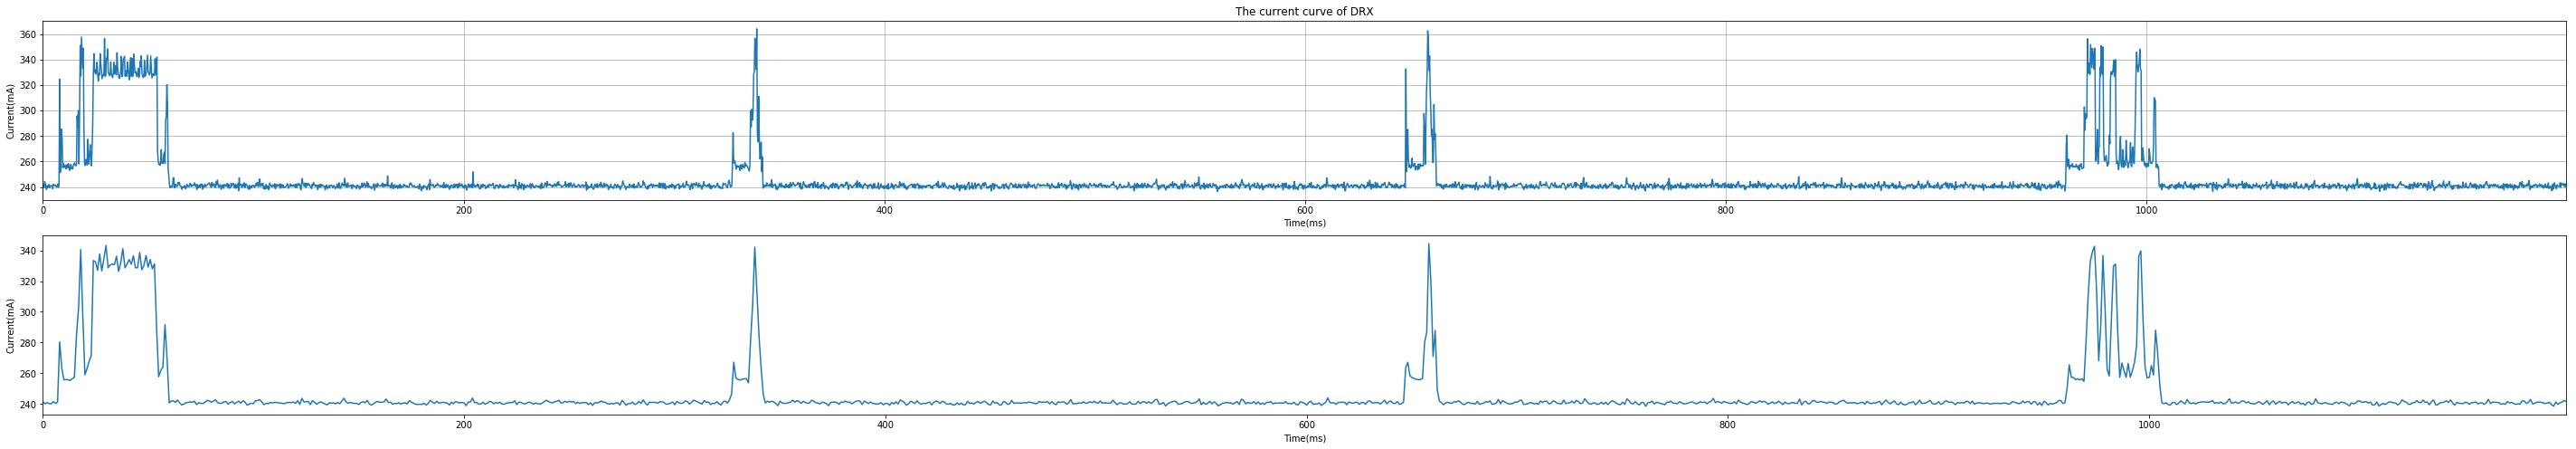

The output of DRX in ms:

        time     current
0        1.0  241.593500
1        2.0  240.233000
2        3.0  241.002750
3        4.0  240.376667
4        5.0  240.161667
5        6.0  241.647000
6        7.0  240.448000
7        8.0  241.235333
8        9.0  280.414750
9       10.0  263.572667
10      11.0  255.822500
11      12.0  255.912333
12      13.0  255.769000
13      14.0  255.446750
14      15.0  256.556333
15      16.0  257.487333
16      17.0  285.193500
17      18.0  302.805333
18      19.0  340.499000
19      20.0  296.433667
20      21.0  259.062333
21      22.0  263.071500
22      23.0  267.939667
23      24.0  271.590667
24      25.0  333.358000
25      26.0  332.588000
26      27.0  326.968000
27      28.0  337.600000
28      29.0  326.574333
29      30.0  334.646500
...      ...         ...
1169  1170.0  239.928750
1170  1171.0  241.665000
1171  1172.0  240.734250
1172  1173.0  241.164000
1173  1174.0  240.376333
1174  1175.0  239.875250
1175  1176.0  240.161667

In [5]:
file = 'drx320-1.txt'

power_data = pd.read_csv(file, sep='\t')

data_in_ms = []
current_ms = 1
current_ms_data = []

power_data['Time(sec)'] *= 1000
power_data['Current(A)'] *= 1000
power_data.columns = ['Time(ms)', 'Current(mA)']

power_handle = pd.DataFrame(columns=['time', 'current'])
for i in power_data.index:
    if power_data.loc[i]['Time(ms)'] < current_ms:
        current_ms_data.append(power_data.loc[i]['Current(mA)'])
    else:
        power_handle.loc[int(power_data.loc[i]['Time(ms)']-1)] = [int(power_data.loc[i]['Time(ms)']), np.asarray(current_ms_data).mean()]
        current_ms_data = []
        current_ms += 1
        current_ms_data.append(power_data.loc[i]['Current(mA)'])

fig, ax = plt.subplots()
fig.set_size_inches(50, 8)

ax_run = plt.subplot(2, 1, 1)
plt.grid(True)
plt.xlabel('Time(ms)')
plt.ylabel('Current(mA)')
plt.title('The current curve of DRX')
plt.xlim(power_data['Time(ms)'].min(), power_data['Time(ms)'].max())
#power_data['Current(mA)'].plot()
plt.plot(power_data['Time(ms)'], power_data['Current(mA)'])

ax_run = plt.subplot(2, 1, 2)
plt.grid(True)
plt.xlabel('Time(ms)')
plt.ylabel('Current(mA)')
power_handle['current'].plot()
plt.show()

fig.savefig('DRX.svg', format='svg', dpi=100, bbox_inches='tight')

print 'The output of DRX in ms:\n\n',power_handle
